# Neural Networks for Machine Learning
## Problem Set 0
Grace Jenkins 

02/16/2021

In [95]:
#imports
import imageio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.special
import scipy.misc

## Part 1
https://www.kdnuggets.com/2018/07/basic-image-data-analysis-np-opencv-p1.html 

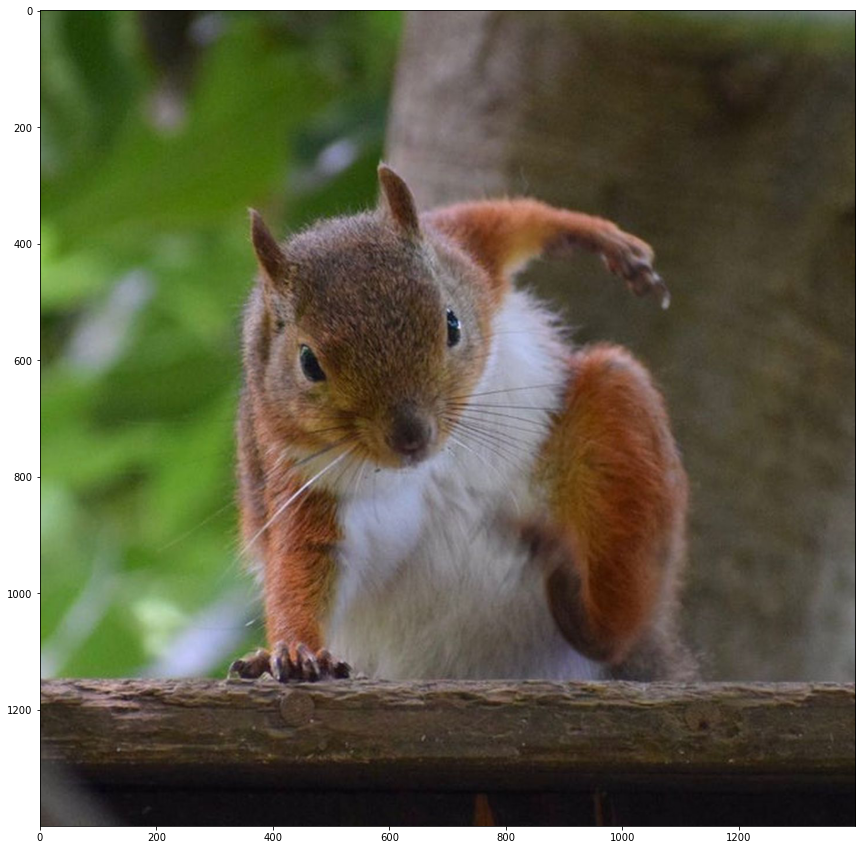

In [96]:
# Import picture
pic = imageio.imread('SquirrelSuperHero.jpg')
plt.figure(figsize=(15,15))

plt.imshow(pic)

In [97]:
# Get type of image and dimensions
print('Type of the image : ',type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

Type of the image :  <class 'imageio.core.util.Array'>

Shape of the image : (1400, 1400, 3)
Image Hight 1400
Image Width 1400
Dimension of Image 3


In [98]:
# Get total image size and range of RGB values
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 5880000
Maximum RGB value in this image 252
Minimum RGB value in this image 0


In [99]:
# Look at a specific pixel located at row: 900, column: 400

pic[400,1000]

print('Value of only R channel {}'.format(pic[900, 400, 0]))
print('Value of only G channel {}'.format(pic[900, 400, 1]))
print('Value of only B channel {}'.format(pic[900, 400, 2]))


Value of only R channel 192
Value of only G channel 132
Value of only B channel 108


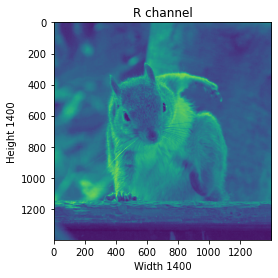

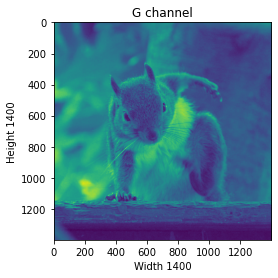

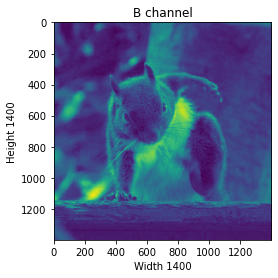

In [100]:
# Look at each channel
plt.title('R channel')

plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 0])
plt.show()

plt.title('G channel')

plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 1])
plt.show()

plt.title('B channel')

plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))
plt.imshow(pic[ : , : , 2])
plt.show()

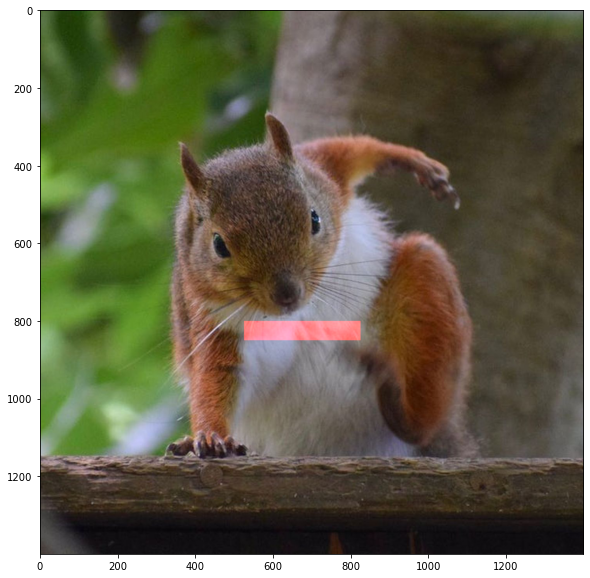

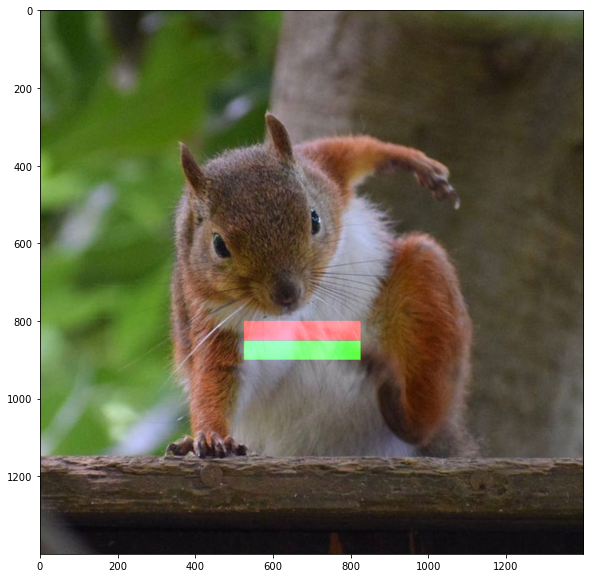

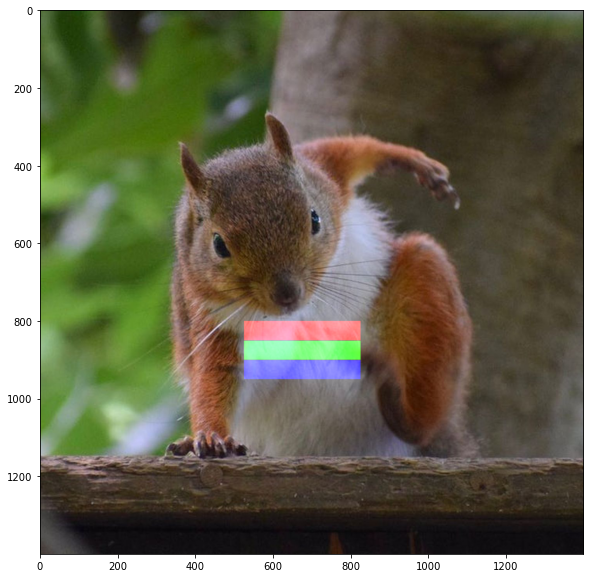

In [101]:
# Change intensity 
pic = imageio.imread('SquirrelSuperHero.jpg')

pic[800:850,525:825, 0] = 255# full intensity to those pixel's R channel
plt.figure(figsize= (10,10))
plt.imshow(pic)
plt.show()

pic[851:900,525:825, 1] = 255# full intensity to those pixel's G channel
plt.figure(figsize= (10,10))
plt.imshow(pic)
plt.show()

pic[901:950,525:825, 2] = 255# full intensity to those pixel's B channel
plt.figure(figsize= (10,10))
plt.imshow(pic)
plt.show()

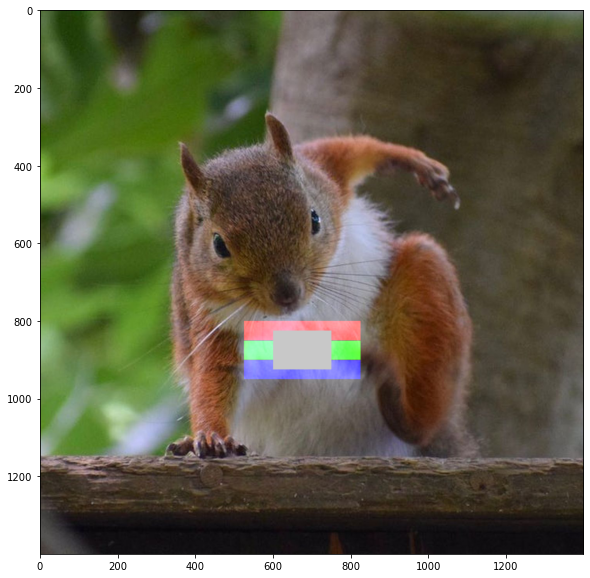

In [102]:
# Change some pixels to white

pic[825:925 , 600:750 , [0,1,2] ] = 200
plt.figure( figsize= (10,10))
plt.imshow(pic)
plt.show()

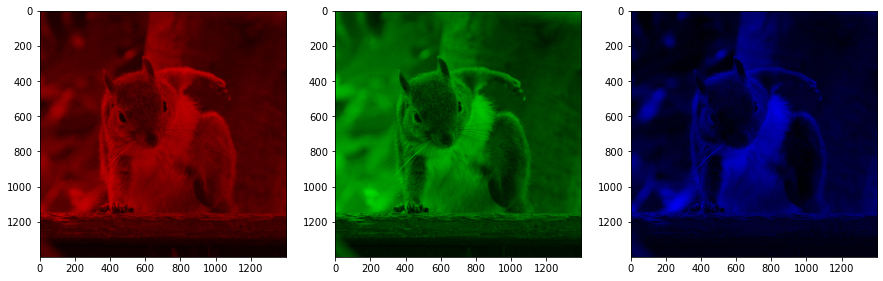

In [103]:
# Split the layers

pic = imageio.imread('SquirrelSuperHero.jpg')

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5)) 

for c,ax in zip(range(3),ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape,dtype="uint8") #'dtype' by default: 'np.float64' 

    # assign each channel 
    split_img[:,:,c] = pic[:,:,c]

    # display each channel
    ax.imshow(split_img)



Text(0.5, 1.0, 'Average Brightness')

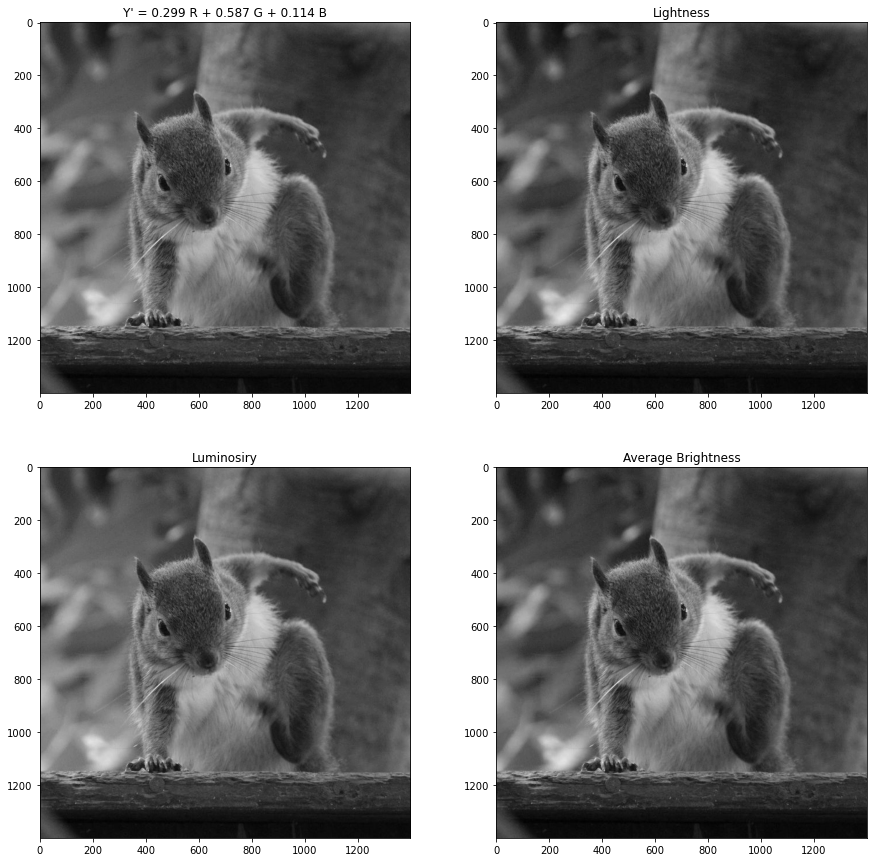

In [104]:
# Convert to greyscale

pic = imageio.imread('SquirrelSuperHero.jpg')
# Y' = 0.299 R + 0.587 G + 0.114 B
gray = lambda rgb: np.dot(rgb[...,:3],[0.299,0.587,0.114])
# Lightness
gray_lightness = lambda rgb: .5 * (np.amax(rgb[...,:3],axis = 2).astype(int) + np.amin(rgb[...,:3],axis = 2).astype(int))
# Luminosity
gray_luminosity = lambda rgb: np.dot(rgb[...,:3],[0.21,0.72,0.07])
# Average Brightness
gray_brightness = lambda rgb: np.dot(rgb[...,:3],[1/3,1/3,1/3])


gray1 = gray(pic) 
gray2 = gray_lightness(pic)
gray3 = gray_luminosity(pic)
gray4 = gray_brightness(pic)

fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15)) 

ax[0,0].imshow(gray1,cmap=plt.get_cmap(name='gray'))
ax[0,0].set_title("Y' = 0.299 R + 0.587 G + 0.114 B")

ax[0,1].imshow(gray2,cmap=plt.get_cmap(name='gray'))
ax[0,1].set_title('Lightness')

ax[1,0].imshow(gray3,cmap=plt.get_cmap(name='gray'))
ax[1,0].set_title('Luminosiry')

ax[1,1].imshow(gray4,cmap=plt.get_cmap(name='gray'))
ax[1,1].set_title('Average Brightness')

## Part 2
https://www.kdnuggets.com/2018/10/preprocessing-deep-learning-covariance-matrix-image-whitening.html

### Page 1

In [105]:
A = np.array([[1,3,5],[5,4,1],[3,8,6]])
np.cov(A, rowvar = False, bias = True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [106]:
def calculateCov(X):
    mean = np.mean(X,axis = 0)
    X = X - mean
    cov = X.T.dot(X)/X.shape[0]
    
    return cov

In [107]:
calculateCov(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

In [108]:
def plotDataAndCov(data, color_palette):
    
    # Find covariance matrix
    cov = np.cov(data, rowvar=False, bias=True)
    print('Covariance matrix:\n', cov)
    
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax0 = plt.subplot(2, 2, 1)
    
    # Set colors
    cmap = sns.color_palette(color_palette, 10)
    sns.heatmap(cov, cmap=cmap, vmin=0)
    
    ax1 = plt.subplot(2, 2, 2)
    # Use colors specified by data if they exist
    if data.shape[1]==3:
        c =data[:,2]
    else:
        c = np.array(sns.color_palette(color_palette)[0])
        
    ax1.scatter(data[:,0], data[:,1], color = c, s=40)


In [109]:
# Make some random data

np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A.shape

(300, 2)

In [110]:
A[:10,:]

array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

/Users/gracejenkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/gracejenkins/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


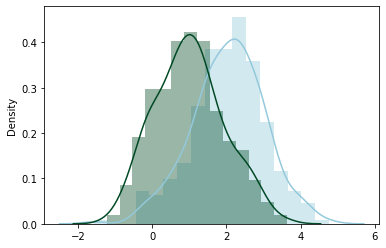

In [111]:
palette = 'ocean_r'
sns.distplot(A[:,0], color = sns.color_palette(palette)[0])
sns.distplot(A[:,1], color = sns.color_palette(palette)[-1])
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


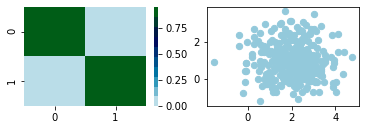

In [112]:
plotDataAndCov(A,'ocean_r')
plt.show()
plt.close()

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


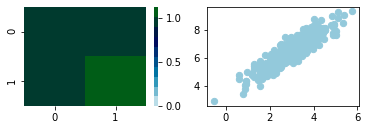

In [126]:
# Create dependent data

np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B,'ocean_r')
plt.show()
plt.close()

### Page 2

In [129]:
# Center the mean
def center(X):
    centered = X - np.mean(X,axis = 0)
    return centered



Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


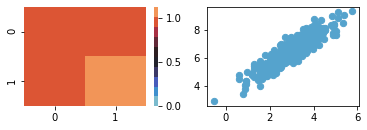

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


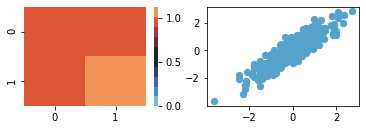

In [135]:
BCentered = center(B)

print("Before:\n\n")

plotDataAndCov(B, 'icefire')
plt.show()
plt.close()

print("After:\n\n")

plotDataAndCov(BCentered,'icefire')
plt.show()
plt.close()

In [136]:
# Standardize the data
def standardize(X):
    standardized = center(X)/np.std(X, axis = 0)
    return standardized

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


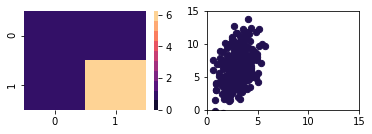

In [154]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C,'magma')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


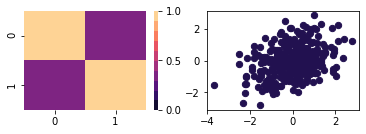

In [155]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized,'magma')
plt.show()
plt.close()

In [156]:
# Decorrelate data

def decorrelate(X):
    
    # Find covariance matrix
    cov = X.T.dot(X)/float(X.shape[0])
    
    # Get eigenvectors & eigenvalues
    eVals, eVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X to rotate data
    decorrelated = X.dot(eVecs)
    
    return decorrelated 
    

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


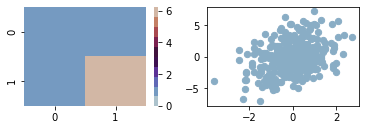

Covariance matrix:
 [[8.21222171e-01 8.28966525e-17]
 [8.28966525e-17 6.35579346e+00]]


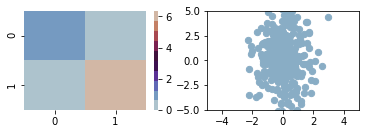

In [157]:
# Whitening

# Center C

CCentered = center(C)

plotDataAndCov(CCentered,'twilight')
plt.show()
plt.close()

# Decorrelate C

CDecorrelated = decorrelate(CCentered)
plotDataAndCov(CDecorrelated, 'twilight')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

In [161]:
def whiten(X):
    
    # Center
    Xcentered = center(X)
    
    # Get covariance
    cov = Xcentered.T.dot(Xcentered)/float(Xcentered.shape[0])
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eVals, eVecs = np.linalg.eig(cov)
    
    # Apply the eigenvectors to X
    decorrelated = Xcentered.dot(eVecs)
    
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eVals + 1e-5)
    
    return whitened
    

Covariance matrix:
 [[9.99987823e-01 2.51650552e-17]
 [2.51650552e-17 9.99998427e-01]]


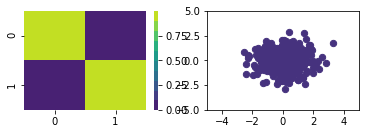

In [167]:
CWhitened = whiten(C)

plotDataAndCov(CWhitened,'viridis')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

### Page 3

In [4]:
import keras.datasets
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape


(50000, 32, 32, 3)

In [178]:
# Get first 1000 images
X = X_train[:1000]
print(X.shape)

(1000, 32, 32, 3)


In [179]:
# Reshape to have one image per row. Each row has 32x32x3 = 3072 entries

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)

(1000, 3072)


In [180]:
# Create function for plotting images

def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

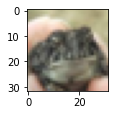

In [183]:
plotImage(X[25, :])

In [184]:
# Rescale to obtain data in range [0,1]

X_norm = X/255
print(X_norm.min())
print(X_norm.max())

0.0
1.0


In [187]:
# Do per-pixel mean subtractions
print(X_norm.mean(axis=0).shape)

X_norm = X_norm - X_norm.mean(axis=0)
print(X_norm.mean(axis = 0))

(3072,)
[ 5.44009282e-18  4.32986980e-18  7.49400542e-18 ...  2.84668122e-18
 -4.08006962e-18  8.34055047e-18]


In [188]:
# Find covariance
cov = np.cov(X_norm, rowvar=False)
cov.shape

(3072, 3072)

In [189]:
# SVD decomposition

U,S,V = np.linalg.svd(cov)
print(U.shape, S.shape)

(3072, 3072) (3072,)


In [191]:
# Whiten the images
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

# Rescale images
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())



min: 0.0
max: 1.0


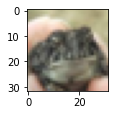

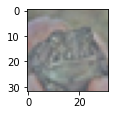

In [192]:
plotImage(X[25, :])
plotImage(X_ZCA_rescaled[25, :])

## Part 3
From Make Your Own Neural Network
(c) Tariq Rashid, 2016
https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/blob/master/part2_neural_network_mnist_data.ipynb

### Part 2
Neural network applied to mnist dataset

#### Make neural network class

In [113]:
class neuralNetwork: 
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learning_rate):
        # set number of nodes in each input, hidden, output layer
        self.Inodes = inputnodes
        self.Hnodes = hiddennodes
        self.Onodes = outputnodes
        
        # Link weight matrices
        self.wIH = np.random.normal(0.0, pow(self.Inodes, -0.5), (self.Hnodes, self.Inodes))
        self.wHO = np.random.normal(0.0, pow(self.Hnodes, -0.5), (self.Onodes, self.Hnodes))
        
        # learning rate
        self.lr = learning_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass
    
    # Train the neural network
    def train(self, input_list, target_list):
        
        # Converts input lists into 2-d array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        # Calculate signals into hidden layer
        hidden_inputs = np.dot(self.wIH, inputs)
        
        # Calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into final output layer
        final_inputs = np.dot(self.wHO, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.wHO.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.wHO += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wIH += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass

    
    # Query the neural network
    def query(self, inputs_list):
        
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wIH, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.wHO, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    # backquery the neural network
    
    def backquery(self, targets_list):
        
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.wHO.T, final_inputs)
        
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wIH.T, hidden_inputs)
        
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs




#### Create instance of neuralNetwork

In [84]:
# Number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
NN = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#### Load data & Train Network

In [114]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [86]:
# Train the neural network

# Use 5 epochs
epochs = 5

for e in range(epochs):
    
    # Go through all records in training data set
    for record in training_data_list:
        
        # Split the record by the ',' commas
        all_values = record.split(',')
        
        # Scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # Create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        
        NN.train(inputs, targets)
        pass
    pass

#### Load test data & Test network

In [115]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [88]:
# Test the neural network

# Initialize scorecard
scorecard = []

# Go through all records in the test data set
for record in test_data_list:
    
    # Split the record by commas
    all_values = record.split(',')
    
    # Correct answer is first value
    correct_label = int(all_values[0])
    
    # Scale and shift inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # Get results from network
    outputs = NN.query(inputs)
    
    # Index with max value is label
    label = np.argmax(outputs)
    
    # Add correct/incorrect to scorecard list
    
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

In [89]:
# Performance score
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9736


#### Test Different Learning Rates & Epochs

### Part 3, own handwriting



loading ... seven.png
min =  0.25396705
max =  0.71394044
[[0.10639089]
 [0.056574  ]
 [0.06621522]
 [0.20474927]
 [0.02240025]
 [0.09705637]
 [0.04458843]
 [0.12083517]
 [0.89038999]
 [0.08095067]]
network says  8


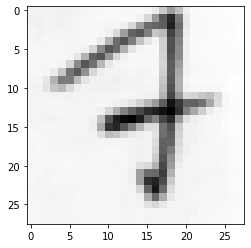

In [90]:
# Test with own image!

# load image data from png files into an array
print ("loading ... seven.png")
img_array = imageio.imread('seven.png', as_gray = True)
    
# Reshape from 28x28 to list of 784 values, invert values to match mnist data
img_data  = 255.0 - img_array.reshape(784)
    
# Scale data to range from 0.01 to 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", np.min(img_data))
print("max = ", np.max(img_data))

# Plot
plt.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# Query the network
outputs = NN.query(img_data)
print (outputs)

# Index with max value is label
label = np.argmax(outputs)
print("network says ", label)

### Part 3, back query

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


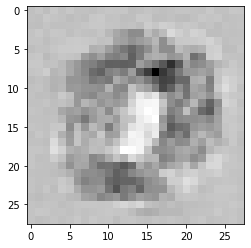

In [92]:
# Added backquery to original class definition


# Run the network backwards, given a label, see what image it produces

# label to test
label = 0

# create the output signals for this label
targets = np.zeros(output_nodes) + 0.01

# label is target label
targets[label] = 0.99
print(targets)

# get image data
image_data = NN.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

### Part 3, Rotations

In [93]:
# Create new instance of the neural network

# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.01

NN_rotations = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [96]:
# Train the network on training images and rotations of such images

# Use 10 epochs
epochs = 10

for e in range(epochs):
    
    # Go through all records in training data set
    for record in training_data_list:
        
        # Split the record by commas
        all_values = record.split(',')
        
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        NN_rotations.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        NN_rotations.train(inputs_plusx_img.reshape(784), targets)
        
        # rotated clockwise by x degrees
        inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        NN_rotations.train(inputs_minusx_img.reshape(784), targets)
        
        
        pass
    pass

## Part 4
https://www.tensorflow.org/tutorials/keras/classification

In [5]:
# import TensorFlow and tf.keras
import tensorflow as tf

print(tf.__version__)

2.4.1


### Import the Fashion MNIST dataset

In [6]:
# Import Fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
# Define classes which are not included in dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore data

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

### Preprocess the Data

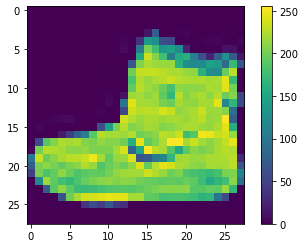

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# Set training and testing values to be in range [0,1]

train_images = train_images / 255.0
test_images = test_images / 255.0

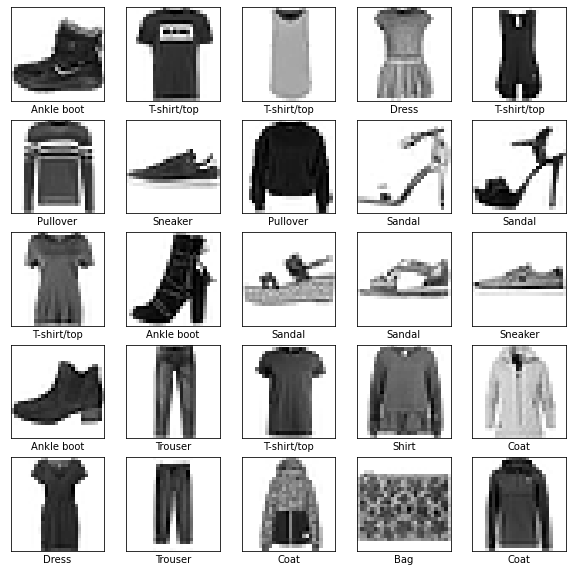

In [19]:
# Display first 25 images

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model

#### Set up layers

In [21]:
# Input layer is flattened input of 28x28, followed by hidden layers of size 128 and output layer of size 10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Compile the model

In [22]:
# Use adam optimizer, Sparse Categorical Cross Entropy loss function, use accurary for metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train model

##### Feed model

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6353 - accuracy: 0.7776: 0s - loss: 0.6616 - 
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3786 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3405 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3128 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2778 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2662 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2572 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2463 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 2s 

##### Evaluate Accuracy

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3324 - accuracy: 0.8865

Test accuracy: 0.8865000009536743


##### Make predictions

In [28]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

array([1.08579725e-05, 1.66523262e-09, 1.13132081e-08, 1.72084378e-06,
       4.03820577e-09, 5.37307467e-03, 5.05978314e-05, 4.69987541e-02,
       3.78431332e-06, 9.47561145e-01], dtype=float32)

In [29]:
# See which label has the highest confidence
np.argmax(predictions[0])

9

In [30]:
# Does it match the test label?
test_labels[0]

9

In [84]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

##### Verify predictions

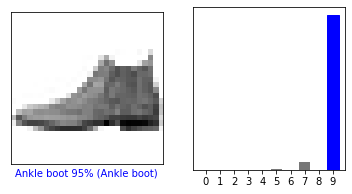

In [85]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

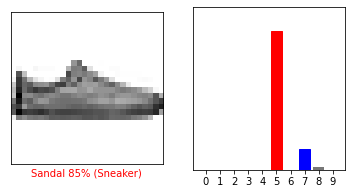

In [86]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

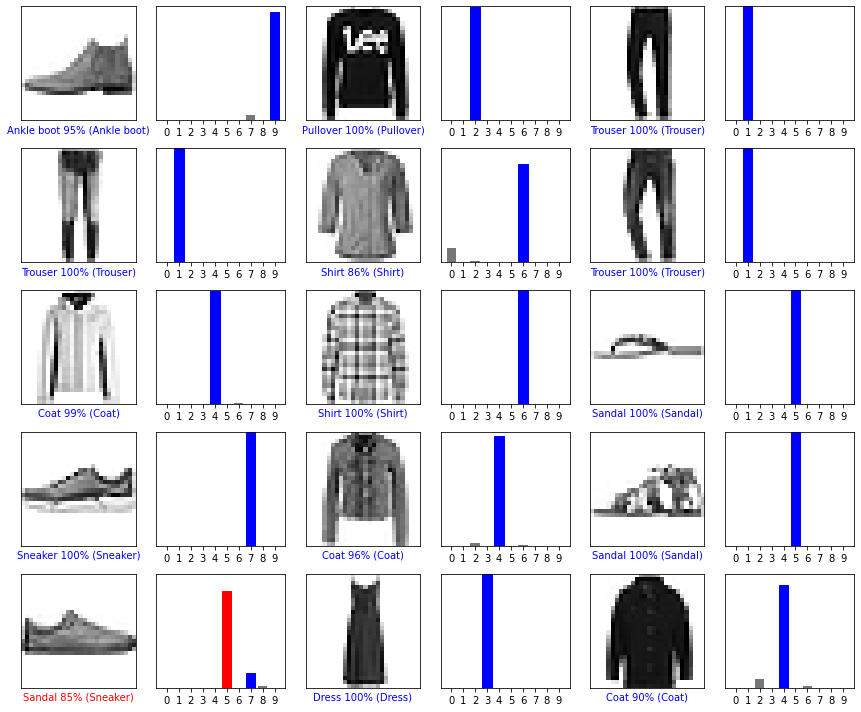

In [87]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#### Used the trained model

In [88]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [89]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[1.14861476e-04 1.95508909e-14 9.96472239e-01 1.09426357e-13
  3.19106225e-03 1.26933533e-11 2.21935290e-04 1.29057910e-15
  3.69113490e-10 1.30042165e-14]]


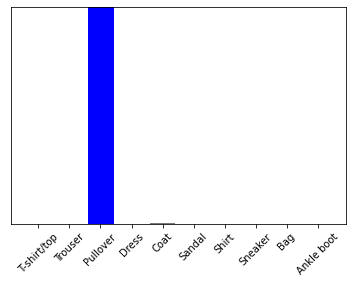

In [90]:
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [91]:
np.argmax(predictions_single[0])

2